In [2]:
import sys
sys.path.append('/home/dnlab/Jupyter-Bitcoin/Heuristics/ExperimentSpeed/complete_code')
import pandas as pd
from test_cluster_db_query import ClusterDB
import test_db_query as dq
import csv
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
cdq = ClusterDB('/home/dnlab/DataSSD/dbv3cluster.db')

In [3]:
df = pd.read_csv('/home/dnlab/DataHDD/tag_v2.csv')

In [4]:
df

,group,smallest_addr,len
0,193,193,3
1,242,242,2
2,365,365,2
3,402,402,8
4,415,337,6
...,...,...,...
61918402,691803153,691803153,2
61918403,691804317,691804317,2
61918404,691804326,691804326,3
61918405,691804467,691804467,2


In [10]:
zerodf = len(df[df['len']== 1])
onedf = len(df[df['len'] < 10])
twodf = len(df[(df['len'] >= 10) & (df['len']<100)])
threedf = len( df[(df['len'] >= 100) & (df['len']<1000)])
#fourdf = len(df[(df['len'] >= 500) & (df['len']<1000)])
fivedf = len(df[(df['len'] >= 1000) & (df['len']<10000)])
sixdf = len(df[(df['len'] >= 10000) & (df['len']<100000)])
sevendf = len(df[(df['len'] >= 100000) & (df['len']<1000000)])
eightdf = len(df[(df['len'] >= 1000000)  & (df['len']<10000000)])
ninedf = len(df[df['len'] > 10000000])
new_df = df[df['len'] >= 100]

In [82]:
new_df = df[df['len'] < 100]

In [74]:
y = [onedf ,twodf, threedf, fivedf,sixdf, sevendf, eightdf, ninedf]
x = np.arange(len(y))#[1,2,3,4,5,6,7,8]
y_label = ['10', '100', '1000', '10000', '100000', '1000000', '100000000', '100000000']
y

[59257451, 2502810, 149945, 6999, 970, 215, 15, 2]

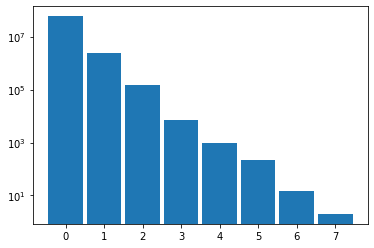

In [90]:
plt.bar(x,y, 0.9)
#plt.xscale('log')
plt.yscale('log')

In [4]:
import numpy as np
x = df['len'].to_list()

y = np.arange(len(x))
y

array([       0,        1,        2, ..., 61918404, 61918405, 61918406])

Text(0.5, 0, 'Num Of Cluster')

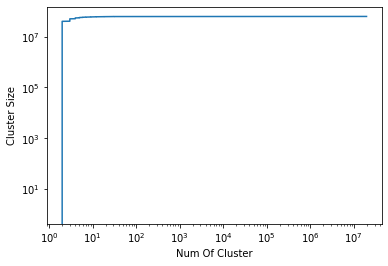

In [6]:
import matplotlib.pyplot as plt
x.sort()

plt.plot(x, y)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Cluster Size')
plt.xlabel('Num Of Cluster')
#plt.xticks([10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000])

In [4]:
Z = df['len'].to_list()
Z.sort()
N = len(Z)
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)

<ipython-input-17-c036f6fd1071>:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.axis([1, 10000000, 0, 100000000])


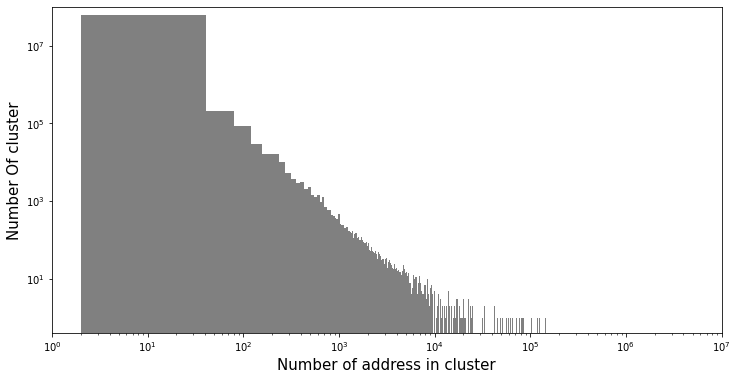

In [17]:
fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(1, 4, hspace=0.2, wspace=0.2)
ax2 = fig.add_subplot(grid[0:])

ax2.hist(df['len'].to_list(), 1000000//2, histtype='bar',
            orientation='vertical', color='grey')

ax2.set_xlabel('Number of address in cluster', fontsize=15)
ax2.set_ylabel('Number Of cluster', fontsize=15)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.axis([1, 10000000, 0, 100000000])
ax2.loglog()
plt.show()

In [69]:
eightdf['ClusterName'] = eightdf['group'].map(lambda x: get_addr_from_tag(x))

0 0.0006165504455566406 []
0 0.007003068923950195 []
0 0.0012278556823730469 []
0 0.0002963542938232422 []
307489 8.525063037872314 ['CryptXXX', 'DMALockerv3', 'EDA2', 'Locky', 'bitcoin', 'CryptoTorLocker2015', 'CERBER6', 'BTC-e.com', 'Bitcoin House Taiwan,https://bitcoinhousetaiwan.wordpress.com/']
0 0.018297910690307617 []
0 0.0005047321319580078 []
0 0.00032520294189453125 []
0 0.00046515464782714844 []


<ipython-input-69-ed3d62cb0b68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eightdf['ClusterName'] = eightdf['group'].map(lambda x: get_addr_from_tag(x))


In [74]:
cat_list = []
count = 0
for addr_group in eightdf['group'].to_list():

    s_time = time.time()
    addr_list = cdq.find_addr_from_cluster_num(addr_group)
    cluster_list = list(cdq.get_Category_from_addr(addr_list))
    
    #if len(addr_list) > 10000:
    count += 1
    cat_list .append( ",".join(cluster_list))
    print(count, cat_list[-1], time.time()-s_time)


1  0.0006952285766601562
2  0.00021457672119140625
3  0.0003025531768798828
4  0.0002677440643310547
5 exchange 8.48744249343872
6  0.014429330825805664
7  0.0002796649932861328
8  0.0002548694610595703
9  0.00021195411682128906


In [71]:
eightdf['Category'] = cat_list

<ipython-input-71-2c640d205555>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eightdf['Category'] = cat_list


In [72]:
eightdf

,group,smallest_addr,len,ClusterName,Category
3599,2253136,223445,153562,,
4312,3082324,1084062,150237,,
4418,3204452,1826793,178944,,
15728,21103919,20775609,128022,,
23120,41663816,41654808,144692,"CryptXXX,DMALockerv3,EDA2,Locky,bitcoin,Crypto...",exchange
24691,46655351,14476127,131480,,
31629,66025729,65993841,161064,,
44639,103871146,66472424,139071,,
46617,109085144,76203735,273082,,


In [73]:
eightdf.to_csv('/home/dnlab/DataHDD/40manCate.csv', index=False, header=None)

AttributeError: 'AxesSubplot' object has no attribute 'xhline'

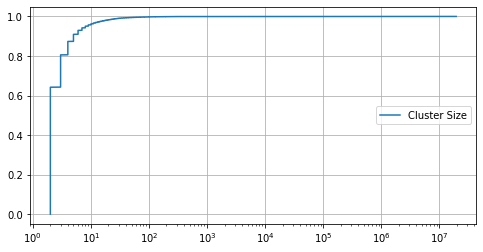

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab


#np.random.seed(19680801)


Z = df['len'].to_list()
Z.sort()
N = len(Z)
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(X2, F2,label='Cluster Size')
#ax.bar(X2, F2,label='Cluster Size')
#n, bins, patches = ax.hist(Z, 100000, density=True, histtype='step',
#                           cumulative=1,label='Empirical')
#n, bins, patches = ax.hist(Z, 100000,density=True,facecolor='g', alpha=0.75)
#y = mlab.normpdf(bins, mu, sigma)
#l = ax.plot(bins, y,)
ax.plot()
ax.grid(True)
ax.legend(loc='right')
ax.set_xscale('log')
ax.xhline()
ax,
#ax.set_yscale('log')

ax.set_title('Cumulative step histograms')
ax.set_xlabel('Cluster size')
ax.set_ylabel('CDF')

#plt.grid(color='gray', linestyle='dotted')
plt.show()

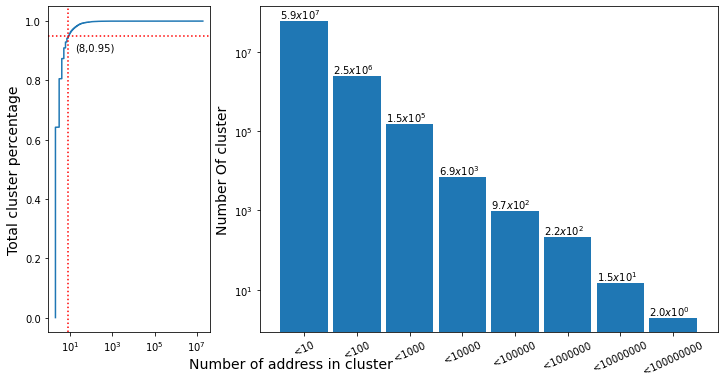

In [43]:
df = pd.read_csv('/home/dnlab/DataHDD/tag_v2.csv')
y = [onedf ,twodf, threedf, fivedf,sixdf, sevendf, eightdf, ninedf]
x = np.arange(len(y))#[1,2,3,4,5,6,7,8]
y_label = ['<10', '<100', '<1000', '<10000', '<100000', '<1000000', '<10000000', '<100000000']
y_text = [59257451, 2502810, 149945, 6999, 970, 215, 15, 2]
y_text = ['$5.9x10^7$', '$2.5x10^6$', '$1.5x10^5$', '$6.9x10^3$', '$9.7x10^2$', '$2.2x10^2$', '$1.5x10^1$', '$2.0x10^0$']

Z = df['len'].to_list()
Z.sort()
N = len(Z)
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)

[59257451, 2502810, 149945, 6999, 970, 215, 15, 2]

ax.grid(True)
ax.legend(loc='right')
ax.set_xscale('log')

fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(1, 16, hspace=0.2, wspace=0.2)
ax1 = fig.add_subplot(grid[5:])
ax2 = fig.add_subplot(grid[:4])

bars = ax1.bar(y_label,y, 0.9)

for index, rect in enumerate(bars):
    height = rect.get_height()
    ax1.annotate('{}'.format(y_text[index]),
                xy=(rect.get_x(), height),va='bottom')
    
ax1.set_yscale('log')
ax1.set_xticklabels(y_label, rotation=25)
ax1.set_ylabel('Number Of cluster', fontsize=14)

ax2.plot(X2, F2,label='Cluster Size')
ax2.axhline(y=0.95, color='red', linestyle='dotted')
ax2.axvline(x=Z[int(len(Z)*0.95)],color='red', linestyle='dotted')
ax2.text(Z[int(len(Z)*0.95)]+10, 0.9, f'({Z[int(len(Z)*0.95)]},0.95)', fontsize=10)
#ax2.set_xlabel('Number of address in cluster', fontsize=15)
ax2.set_ylabel('Total cluster percentage', fontsize=14)
ax2.set_xscale('log')


#ax.axis([1, 1000, 1, 100000000])
plt.xlabel('Number of address in cluster', fontsize= 14, horizontalalignment='center', position=(1.5,90))
plt.show()


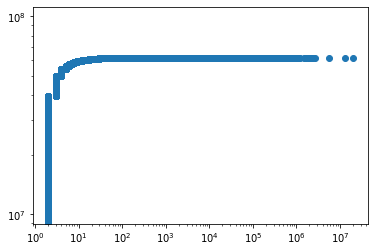

In [50]:
plt.scatter(Z,list(range(0,len(Z))))
plt.xscale('log')
plt.yscale('log')

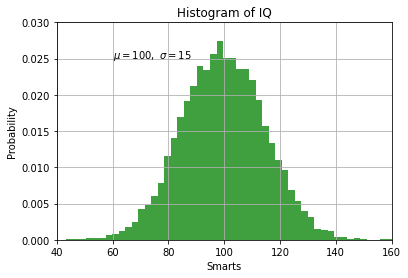

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(40, 160)
plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

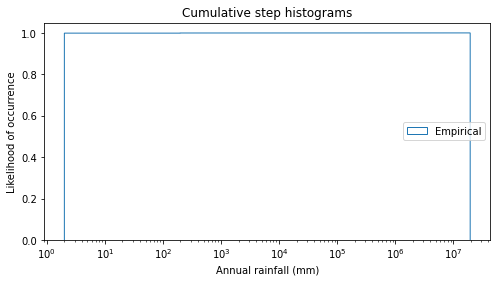

In [22]:
import numpy as np
import matplotlib.pyplot as plt

#np.random.seed(19680801)

mu = 200
sigma = 25
n_bins = 100000#10000000
graph_x = df['len'].to_list()#x#np.random.normal(mu, sigma, size=100)
graph_x.sort()
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(graph_x, n_bins, density=True, histtype='step',
                           cumulative=1,label='Empirical')

# Add a line showing the expected distribution.
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

#ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# Overlay a reversed cumulative histogram.
#ax.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,
#        label='Reversed emp.')

# tidy up the figure
#ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Annual rainfall (mm)')
ax.set_ylabel('Likelihood of occurrence')
ax.set_xscale('log')

plt.show()

In [62]:
df = df[df['len'] >= 1000000]

In [47]:
df.to_csv('/home/dnlab/DataHDD/multi-input.csv')

In [6]:
def get_addr_from_tag(addr_group):
    s_time = time.time()
    addr_list = cdq.find_addr_from_cluster_num(addr_group)
    cluster_list = list(cdq.get_tag_from_addr(addr_list))
    
    #if len(addr_list) > 10000:
    print(len(addr_list), time.time() - s_time, cluster_list)
    return ",".join(cluster_list)

In [7]:
df['ClusterName'] = df['group'].map(lambda x: get_addr_from_tag(x))

13319582 35.18125915527344 ['Purchases', 'Secondstrade AUDUSD Up,http://secondstrade.com', 'Secondstrade 5seconds DOWN,http://secondstrade.com', 'Secondstrade 5Seconds+1 Up,http://secondstrade.com', 'Roberts Anime Corner Store', 'wallet', 'CryptoFast Giveaway', 'eastendtech,https://bitcointalk.org/index.php?action=profile;u=30691', 'Secondstrade 7Seconds UP,http://secondstrade.com', 'bitcoinearn.co', 'Secondstrade BTCUSD 30min Down,http://secondstrade.com', 'Secondstrade BTCUSD 30min Up,http://secondstrade.com', 'Bitcoin.com Coinbase Bump', 'Secondstrade Silver Up,http://secondstrade.com', 'tsvekric,https://bitcointalk.org/index.php?action=profile;u=18363', 'HackPSU Winner', 'YouTubePaperWalletGuy', 'Forum.Bitcoin.com Donation', 'vk.com', 'btc.expectations', 'Receiving Wallet', 'die Adresse von Hans', 'KB5988,https://bitcointalk.org/index.php?action=profile;u=69879', 'Laxo Trade,https://www.laxotrade.com', 'btcom2', 'private', 'AIOBuy Dontation', 'Satoshi Dice Cold Storage,https://sato

<ipython-input-7-70179c314672>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ClusterName'] = df['group'].map(lambda x: get_addr_from_tag(x))


In [8]:
df

,group,smallest_addr,len,ClusterName
1671972,18535403,109543,13319582,"Purchases,Secondstrade AUDUSD Up,http://second..."
3668815,30857699,27907258,1548766,"bitcoin,Bittrex.com,CERBER6"
5917937,45659124,14400121,2181061,"Flyper,bitcoin,CryptoTorLocker2015,Xapo.com"
5966313,45999571,45999571,1069477,"bitcoin,Huobi.com-2"
7422387,56507757,56126645,1630483,"bitcoin,Cubits.com"
10340193,76638394,76638394,2302427,bitcoin
11970418,87633905,49416997,2086164,
13767970,100393440,3367244,19556618,"Diodesign,http://www.diodesign.co.uk/,karlzt,h..."
21879671,181017548,171883688,1843907,CERBER6
22813996,191865735,191634580,1240586,"bitcoin,CERBER6"


In [9]:
cat_list = []
count = 0
for addr_group in df['group'].to_list():

    s_time = time.time()
    addr_list = cdq.find_addr_from_cluster_num(addr_group)
    cluster_list = list(cdq.get_Category_from_addr(addr_list))
    
    #if len(addr_list) > 10000:
    count += 1
    cat_list .append( ",".join(cluster_list))
    if count % 10 == 0:
        print(count, cat_list[-1], time.time()-s_time)


10 DeepWeb,Ransomeware 11.438172101974487


In [10]:
df['Category'] = cat_list

<ipython-input-10-3dab4bd5cfe5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = cat_list


In [412]:
df['len'].sum()

63202556

In [39]:
cat_list[2]

'DeepWeb,Ransomeware,Services&others,hosted wallet'

In [50]:
entity = df['ClusterName'].to_list()
entity

['',
 'bitcoin,Huobi.com-2',
 '',
 'bitcoin,CERBER6',
 'PinPays.cc',
 'bitcoin,Bittrex.com,CERBER6',
 'bitcoin,Cubits.com',
 'CERBER6',
 'Binance.com,black_market',
 '',
 'Flyper,bitcoin,CryptoTorLocker2015,Xapo.com',
 'bitcoin',
 '',
 '',
 'CoinPayments.net',
 'Purchases,Secondstrade AUDUSD Up,http://secondstrade.com,Secondstrade 5seconds DOWN,http://secondstrade.com,Secondstrade 5Seconds+1 Up,http://secondstrade.com,Roberts Anime Corner Store,wallet,CryptoFast Giveaway,eastendtech,https://bitcointalk.org/index.php?action=profile;u=30691,Secondstrade 7Seconds UP,http://secondstrade.com,bitcoinearn.co,Secondstrade BTCUSD 30min Down,http://secondstrade.com,Secondstrade BTCUSD 30min Up,http://secondstrade.com,Bitcoin.com Coinbase Bump,Secondstrade Silver Up,http://secondstrade.com,tsvekric,https://bitcointalk.org/index.php?action=profile;u=18363,HackPSU Winner,YouTubePaperWalletGuy,Forum.Bitcoin.com Donation,vk.com,btc.expectations,Receiving Wallet,die Adresse von Hans,KB5988,https://bit

In [36]:
new_list = list()
for index, element in enumerate(entity):
    entity_list = list()
    for i in element.split(','):
        if i[0:4] == 'http':
            print(i)
            continue
        entity_list.append(i)
    str_entity = ','.join(entity_list)
    new_list.append(str_entity)

http://secondstrade.com
http://secondstrade.com
http://secondstrade.com
https://bitcointalk.org/index.php?action=profile;u=30691
http://secondstrade.com
http://secondstrade.com
http://secondstrade.com
http://secondstrade.com
https://bitcointalk.org/index.php?action=profile;u=18363
https://bitcointalk.org/index.php?action=profile;u=69879
https://www.laxotrade.com
https://satoshidice.com
https://bitcointalk.org/index.php?action=profile;u=56964
http://secondstrade.com
http://secondstrade.com
https://gist.github.com/gavinandresen/3966071
http://secondstrade.com
http://secondstrade.com
https://www.flashback.org/u760178
https://bitcointalk.org/index.php?action=profile;u=16883
http://secondstrade.com
http://secondstrade.com
https://bitcointalk.org/index.php?action=profile;u=25138
https://www.bitcoincloudservices.com/
http://secondstrade.com
https://bitcointalk.org/index.php?action=profile;u=41911
http://secondstrade.com
http://secondstrade.com
http://thebitcoincatalog.com
http://bitcoin-otc.c

In [40]:
new_list

['Purchases,Secondstrade AUDUSD Up,Secondstrade 5seconds DOWN,Secondstrade 5Seconds+1 Up,Roberts Anime Corner Store,wallet,CryptoFast Giveaway,eastendtech,Secondstrade 7Seconds UP,bitcoinearn.co,Secondstrade BTCUSD 30min Down,Secondstrade BTCUSD 30min Up,Bitcoin.com Coinbase Bump,Secondstrade Silver Up,tsvekric,HackPSU Winner,YouTubePaperWalletGuy,Forum.Bitcoin.com Donation,vk.com,btc.expectations,Receiving Wallet,die Adresse von Hans,KB5988,Laxo Trade,btcom2,private,AIOBuy Dontation,Satoshi Dice Cold Storage,BumbleBeeTC,whiskers75,Secondstrade BTCUSD 720M Up,secondstrade.com BTCUSD UP,gavinandresen Multisig Test,Secondstrade 7Seconds Down,Secondstrade Odd-Even Down,SecondsTrade.com,wendelinen,BitcoinCloudServices.com,Donaciones,Ties,BTCjam-Doubler.ml - INVESTMENT,Secondstrade EURUSD Up,label2,Hussam Main Wallet,Secondstrade 5seconds+4 UP,csgopvp,Donation for block generator,Mauricio Macri - betvote.net,aiobuy,SharedCoin,satoshi nakamoto,Synergy Solutions,LLC.,taylorauburn,Bitcoin.com 

In [44]:
df = df.sort_values('len')

In [46]:
df

,group,smallest_addr,len,ClusterName,Category
51303785,551495664,551415731,1029439,,
5966313,45999571,45999571,1069477,"bitcoin,Huobi.com-2","exchange,DeepWeb"
45111134,473775585,423521931,1147507,,
22813996,191865735,191634580,1240586,"bitcoin,CERBER6","DeepWeb,Ransomeware"
31627194,302536050,300236773,1463934,PinPays.cc,darknet market
3668815,30857699,27907258,1548766,"bitcoin,Bittrex.com,CERBER6","exchange,DeepWeb,Ransomeware"
7422387,56507757,56126645,1630483,"bitcoin,Cubits.com","exchange,DeepWeb,Services&others"
21879671,181017548,171883688,1843907,CERBER6,Ransomeware
29681876,278629368,276476513,2009284,"Binance.com,black_market","exchange,DeepWeb"
11970418,87633905,49416997,2086164,,


In [49]:
df

,group,smallest_addr,len,ClusterName,Category
51303785,551495664,551415731,1029439,,
5966313,45999571,45999571,1069477,"bitcoin,Huobi.com-2","exchange,DeepWeb"
45111134,473775585,423521931,1147507,,
22813996,191865735,191634580,1240586,"bitcoin,CERBER6","DeepWeb,Ransomeware"
31627194,302536050,300236773,1463934,PinPays.cc,darknet market
3668815,30857699,27907258,1548766,"bitcoin,Bittrex.com,CERBER6","exchange,DeepWeb,Ransomeware"
7422387,56507757,56126645,1630483,"bitcoin,Cubits.com","exchange,DeepWeb,Services&others"
21879671,181017548,171883688,1843907,CERBER6,Ransomeware
29681876,278629368,276476513,2009284,"Binance.com,black_market","exchange,DeepWeb"
11970418,87633905,49416997,2086164,,


In [435]:
mdf = pd.read_csv('/home/dnlab/DataHDD/multicluster.csv')
mdf = mdf.replace('darknet market', 'DeepWeb')
mdf = mdf.replace('PinPays.cc', 'black_market' )

In [460]:
result = pd.merge(mdf, df, how='left', on=['group'])
rdf = result[['ClusterName', 'Category', 'len']]
rdf.sort_values(['len'])

,ClusterName,Category,len
0,bitcoin,DeepWeb,1069477
1,Huobi.com,exchange,1069477
2,bitcoin,DeepWeb,1240586
3,CERBER6,Ransomeware,1240586
4,black_market,DeepWeb,1463934
5,Bittrex.com,exchange,1548766
6,bitcoin,DeepWeb,1548766
7,CERBER6,Ransomeware,1548766
8,Cubits.com,Services&others,1630483
9,bitcoin,DeepWeb,1630483


In [425]:
sum = 0
for i in df['len'].tolist():
    sum = sum + i

In [97]:
sum

63202556

In [437]:
count_df = rdf.groupby(['Category','ClusterName']).count()
count_df

len
Category        ClusterName                                            
DeepWeb         adult                                                 1
                bitcoin                                               8
                black_market                                          3
                legal                                                 2
Gambling        FreeBitco.in                                          1
                SecondsTrade.com                                      1
                secondstrade.com BTCUSD DOWN,http://secondstrad...    1
Old&historic    Bitcoin-24.com-old-hotwallet                          1
Pools           Discus Fish (F2Pool)                                  1
Ransomeware     APT                                                   1
                CERBER6                                               4
                CryptoTorLocker2015                                   2
                Flyper                                                1
                Locky                                                 1
                NoobCrypt                                             1
Services&others CoinPayments.net                                      1
                Cubits.com                                            1
                Xapo.com                                              1
                ePay.info                                             1
exchange        Binance.com                                           1
                Bittrex.com                                           1
                Bter.com                                              1
                Huobi.com                                             1
                MtGox.com                                             1
                QuadrigaCX.com “Cold Wallet”                          1
                TradeHill.com                                         1
mixing          SharedCoin                                            1

In [466]:
sum_df = rdf.groupby(['Category']).sum()
result = sum_df.sort_values(['len']).reset_index()
#result.replace('darknet market', 'DeepWeb')
result

,Category,len
0,Old&historic,13319582
1,Pools,13319582
2,mixing,13319582
3,Services&others,22883037
4,Gambling,39958746
5,exchange,57905855
6,Ransomeware,94304399
7,DeepWeb,118311654


In [439]:
sum_df = rdf.groupby(['Category','ClusterName']).sum()
sum_re =  sum_df.reset_index()
exchange = sum_re[sum_re['Category'] == 'exchange']
exchange['ratio'] = exchange['len']/57905855
exchange = exchange.sort_values(['len'])
exchange['ratio'].tolist()
exchange
labels = result['Category'].to_list()
labels

<ipython-input-439-055d755d251b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange['ratio'] = exchange['len']/57905855


['Old&historic',
 'Pools',
 'mixing',
 'Services&others',
 'Gambling',
 'exchange',
 'Ransomeware',
 'DeepWeb']

In [440]:
deep= sum_re[sum_re['Category'] == 'DeepWeb']
deep['ratio'] = deep['len']/116847720
deep

<ipython-input-440-51aed8eb8a39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deep['ratio'] = deep['len']/116847720


,Category,ClusterName,len,ratio
0,DeepWeb,adult,19556618,0.167368
1,DeepWeb,bitcoin,42849000,0.366708
2,DeepWeb,black_market,23029836,0.197093
3,DeepWeb,legal,32876200,0.281359


In [467]:
print(len(result['len']))

8


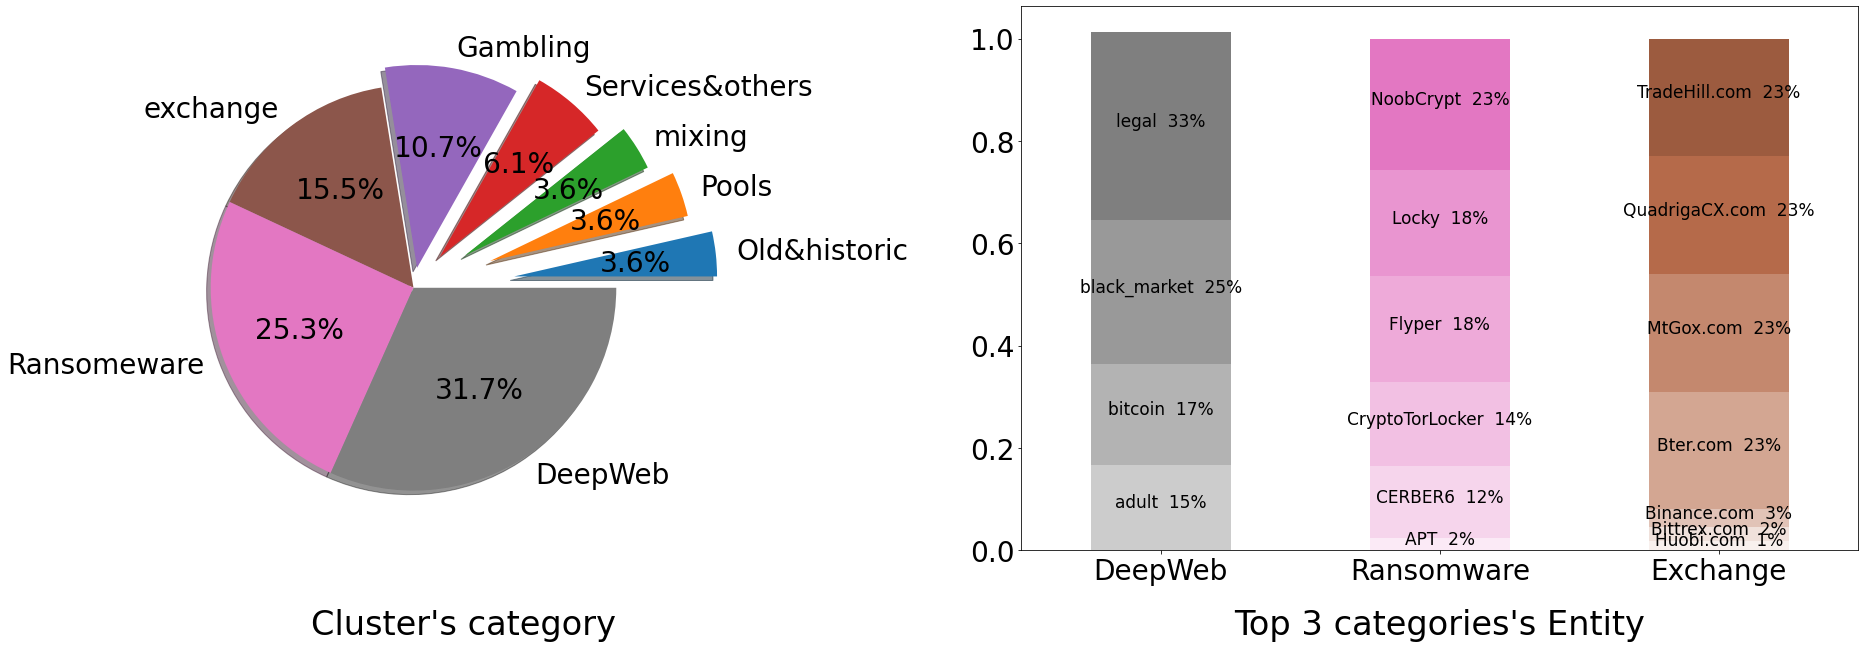

In [474]:
##### import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
mpl.rcParams['font.size'] = 28

import numpy as np
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

fig1= plt.figure(figsize=(30, 10))
gs = GridSpec(1, 6, figure=fig1)
ax1 = fig1.add_subplot(gs[:2])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig1.add_subplot(gs[3:])

#ax2 = fig1.add_subplot(1,6,2,sharex = ax2, sharey=ax2)
#ax4 = fig1.add_subplot(1,6,1,sharex = ax2, sharey=ax2)

fig1.subplots_adjust(wspace=0)

labels = result['Category'].to_list()
sizes = result['len'].to_list()
explode = (0.5, 0.4, 0.3, 0.2,0.1,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


# bar chart parameters
xpos = 1
bottom = 0
ratios = exchange['ratio'].tolist()
ratios.sort
label = exchange['ClusterName'].tolist()
label = ['Huobi.com', 'Bittrex.com', 'Binance.com', 'Bter.com', 'MtGox.com', 'QuadrigaCX.com', 'TradeHill.com']
label.sort

width = .5
colors =  ['#f8f0ed','#f0e1db','#e1c3b7','#d3a692', '#c4886e', '#b56a4a', '#9c5b3f']
#['#ffe6f2','#ffcce6','#ffb3d9','#ff99cc','#ff80bf','#ff66b3','#ff4da6']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    label_text = f'{label[j]}  '+ "%d%%" % (height * 100)
    ax2.text(xpos, ypos, label_text, fontsize = 17,
             ha='center')





# bar chart parameters
xpos = 0
bottom = 0
ratiod = ransome['ratio'].to_list()
ratiod.sort()
label = ransome['ClusterName'].to_list()
label[2] = 'CryptoTorLocker'
label.sort()
width = .5
colors = ['#e377c2','#e995d0', '#eeaad9', '#f2c0e3', '#f6d5ec', '#fbeaf6']
colors.reverse()
for j in range(len(ratiod)):
    height = ratiod[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + height / 2
    bottom += height
    label_text = f'{label[j]}  '+ "%d%%" % (height * 90)
    ax2.text(xpos, ypos, label_text,fontsize = 17,
             ha='center')




# bar chart parameters
xpos = -1
bottom = 0
ratiod = deep['ratio'].to_list()
ratiod.sort()
label = deep['ClusterName'].to_list()
label.sort()
width = .5
colors =['#7f7f7f', '#999999', '#b3b3b3', '#cccccc']
colors.reverse()
 #['#9c5b3f', '#b56a4a', '#c4886e', '#d3a692']
for j in range(len(ratiod)):
    height = ratiod[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + height / 2
    bottom += height
    label_text = f'{label[j]}  '+ "%d%%" % (height * 90)
    ax2.text(xpos, ypos, label_text,fontsize = 17,
             ha='center')

#ax4.set_title('perchantage of \nexchange ')
#ax4.legend(('APT', 'CERBER6', 'CrpytoTorLocker', 'Flyper','Locky','NoobCrpyt'))

ax2.set_xlim(-1.5,1.5)
ax2.set_xticks([-1, 0, 1])
ax2.set_xticklabels(['DeepWeb','Ransomware','Exchange'])



ax1.set_title("Cluster's category", y=-.2, pad=25)
ax2.set_title("Top 3 categories's Entity", y=-.2, pad=25)
plt.show()

PAR


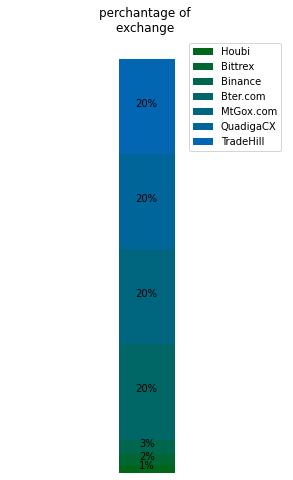

In [255]:
## import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

fig1= plt.figure(figsize=(30, 8))
ax2 = fig1.add_subplot(1,6,3)
ax3 = fig.add_subplot(1,6,2,sharex = ax2)
ax4 = fig.add_subplot(1,6,1,sharex = ax2)
fig1.subplots_adjust(wspace=0)

# bar chart parameters
xpos = 0
bottom = 0
ratios = exchange['ratio'].tolist()
width = .2
colors = [[.001, .4, .1], [.001, .4, .2], [.001, .4, .3], [.001, .4, .4], [.001, .4, .5], [.001, .4, .6], [.01, .4, .7]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 90),
             ha='center')

ax2.set_title('perchantage of \nexchange ')
ax2.legend(('Houbi', 'Bittrex', 'Binance', 'Bter.com','MtGox.com','QuadigaCX','TradeHill'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)


# bar chart parameters
xpos = 0
bottom = 0
ratiod = ransome['ratio'].to_list()
width = .2
colors = [[.001, .04, .01], [.001, .04, .02], [.001, .04, .03], [.001, .04, .04], [.001, .04, .05], [.001, .004, .05]]

for j in range(len(ratiod)):
    height = ratiod[j]
    ax3.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax3.patches[j].get_height() / 2
    bottom += height
    ax3.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 90),
             ha='center')

ax3.set_title('perchantage of \nexchange ')
ax3.legend(('APT', 'CERBER6', 'CrpytoTorLocker', 'Flyper','Locky','NoobCrpyt'))
ax3.axis('off')
ax3.set_xlim(- 2.5 * width, 2.5 * width)


# bar chart parameters
xpos = 0
bottom = 0
ratiod = ransome['ratio'].to_list()
width = .2
colors = [[.001, .04, .01], [.001, .04, .02], [.001, .04, .03], [.001, .04, .04], [.01, .04, .05], [.01, .04, .05]]

for j in range(len(ratiod)):
    height = ratiod[j]
    ax4.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax3.patches[j].get_height() / 2
    bottom += height
    ax4.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 90),
             ha='center')

ax4.set_title('perchantage of \nexchange ')
ax4.legend(('APT', 'CERBER6', 'CrpytoTorLocker', 'Flyper','Locky','NoobCrpyt'))
ax4.axis('off')
ax4.set_xlim(- 2.5 * width, 2.5 * width)
print("PAR")
plt.show()

In [250]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [.27, .56, .17]
labels = ['Approve', 'Disapprove', 'Undecided']
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# bar chart parameters

xpos = 0
bottom = 0
ratios = [.33, .54, .07, .06]
width = .2
colors = [[.1, .3, .5], [.1, .3, .3], [.1, .3, .7], [.1, .3, .9]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('Age of approvers')
ax2.legend(('50-65', 'Over 65', '35-49', 'Under 35'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

TypeError: 'int' object is not callable

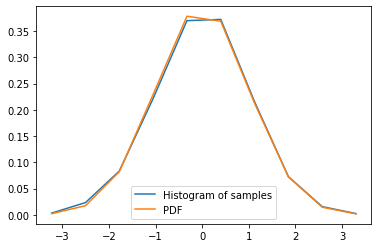

In [7]:
import numpy as np

